In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

In [ ]:
AccDict={}

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Blood_samples_dataset.csv")
dataset

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,88.745398,164.648986,7.977587,160483.916400,5750.896435,4.636745,38.340444,64.593344,21.931813,34.368769,...,5.567696,128.513338,44.464599,10.255846,18.127648,75.909278,0.864603,0.024752,0.269851,Thalassemia
1,91.655318,182.323755,9.829500,334624.369788,7592.373009,3.835851,31.979465,76.793555,26.837216,32.324219,...,5.494498,117.107477,44.810738,17.570144,26.675088,96.259357,0.643421,0.024176,0.230941,Anemia
2,84.585084,174.978108,8.827604,336187.673263,9230.644677,4.614338,36.316898,66.538905,21.107809,32.986063,...,4.461032,118.164588,42.624499,50.235033,34.856542,86.082633,0.875048,0.037318,0.249224,Thalassemia
3,89.451092,163.471972,12.971330,383353.281756,9202.974727,5.308061,45.772641,80.585989,30.708618,34.038035,...,4.653919,113.533812,41.054196,8.840745,31.515443,81.523787,0.905224,0.009725,0.223425,Healthy
4,73.003778,156.078651,9.508795,316801.763755,6128.291310,4.313145,30.901451,79.257418,23.804128,30.325409,...,5.056972,110.582695,40.558452,54.729142,34.582405,62.936753,0.869506,0.025401,0.057178,Anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,78.467304,196.030695,9.660400,248017.013263,7322.896501,5.053746,36.629959,62.645940,21.071221,31.740195,...,4.599571,122.174444,40.130326,30.375447,33.817132,85.201789,0.884438,0.025786,0.272084,Thalassemia
1996,89.794868,199.208832,9.622338,367917.227317,6464.105997,5.126182,38.511034,68.566524,20.252809,34.769170,...,4.151174,121.470573,55.986503,42.545366,16.067826,87.591018,0.606434,0.012204,0.119646,Thalassemia
1997,94.588648,198.728059,9.828401,364022.336598,4571.157930,5.328591,30.750623,72.023879,20.400870,33.050342,...,5.112558,100.175238,48.060647,9.054448,30.204996,98.757940,0.993157,0.008975,0.106570,Thalassemia
1998,83.755948,192.621517,14.307665,890931.140750,5250.891739,4.569858,38.342342,82.944120,31.002047,33.976087,...,5.474767,123.730846,53.764718,51.770217,31.425448,98.157450,0.614873,0.036866,0.166722,Thromboc


In [ ]:
dataset.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
X = dataset.drop(["Disease"], axis=1)
y = dataset.Disease
y

0       Thalassemia
1            Anemia
2       Thalassemia
3           Healthy
4            Anemia
           ...     
1995    Thalassemia
1996    Thalassemia
1997    Thalassemia
1998       Thromboc
1999        Healthy
Name: Disease, Length: 2000, dtype: object

In [ ]:
labels,counts = pd.factorize(dataset['Disease'])
counts

Index(['Thalassemia', 'Anemia', 'Healthy', 'Thromboc', 'Diabetes'], dtype='object')

In [ ]:
dataset.Disease.value_counts()

Disease
Thalassemia    400
Anemia         400
Healthy        400
Thromboc       400
Diabetes       400
Name: count, dtype: int64

### **Data Preprocessing**

In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

### **Train Test Split**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
xtrain

array([[0.91979579, 0.99475346, 0.74091517, ..., 0.52160076, 0.93427183,
        0.82641999],
       [0.13835779, 0.28542263, 0.21746626, ..., 0.27638432, 0.05014785,
        0.04756605],
       [0.16983665, 0.02070773, 0.76773757, ..., 0.17327832, 0.76789273,
        0.05843402],
       ...,
       [0.87705703, 0.55504448, 0.85069348, ..., 0.16269074, 0.0423838 ,
        0.6036689 ],
       [0.2150446 , 0.00704674, 0.32373995, ..., 0.64987973, 0.94193916,
        0.07142082],
       [0.00923011, 0.10715204, 0.83902603, ..., 0.97001637, 0.72840465,
        0.09236999]])

Text(0, 0.5, 'error rate')

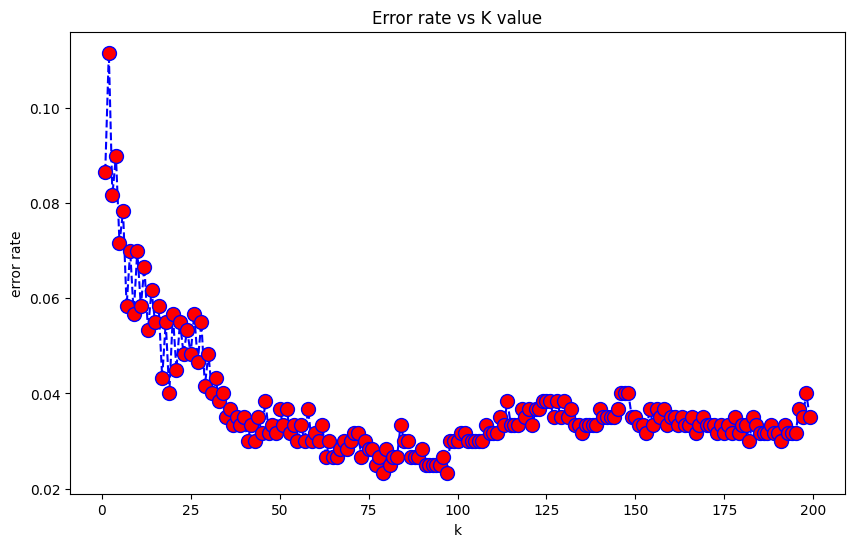

In [ ]:
error=[]
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred1=knn.predict(xtest)
    error.append(np.mean(pred1!=ytest))
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

### **Kth Nearest Neighbor Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(xtrain,ytrain)
pred_knn = knn.predict(xtest)
KNN = accuracy_score(pred_knn,ytest)*100
ki = {'KNN':KNN}
AccDict.update(ki)
print(f"Accuracy: {KNN}%")

Accuracy: 95.16666666666667%


### **Decision Tree Model**

In [ ]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
dtc_score=model.score(xtest, ytest)*100
dtc={'DecisionTree':dtc_score}
AccDict.update(dtc)
dtc

{'DecisionTree': 99.83333333333333}

### **Support Vector Machine Model**

In [ ]:
# Train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = svm_model.predict(xtest)

# Calculate the accuracy
accuracy = accuracy_score(ytest, y_pred)*100
sv={'SVM':accuracy}
AccDict.update(sv)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")
sv

Accuracy of the SVM model: 9900.00%


{'SVM': 99.0}

### **Random Forest Model**

In [ ]:
# Train the RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_rf = rf_model.predict(xtest)

# Calculate the accuracy
accuracy_rf = accuracy_score(ytest, y_pred_rf)*100
rf={'RandomForest':accuracy_rf}
AccDict.update(rf)
print(f"Accuracy of the RandomForest model: {accuracy_rf * 100:.2f}%")
rf

Accuracy of the RandomForest model: 9983.33%


{'RandomForest': 99.83333333333333}

### **Adaboost Model**

In [ ]:
# Train the AdaBoost model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = adaboost_model.predict(xtest)

# Calculate the accuracy
accuracy = accuracy_score(ytest, y_pred)*100
ab={'Adaboost':accuracy}
AccDict.update(ab)
print(f"Accuracy of the AdaBoost model: {accuracy}%")
ab

Accuracy of the AdaBoost model: 58.5%


{'Adaboost': 58.5}

### **Naive Bayes Model**

In [ ]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = nb_model.predict(xtest)

# Calculate the accuracy
accuracy = accuracy_score(ytest, y_pred)*100
nb={'Naive Bayes':accuracy}
AccDict.update(nb)
print(f"Accuracy of the Naive Bayes model: {accuracy}%")
nb

Accuracy of the Naive Bayes model: 99.5%


{'Naive Bayes': 99.5}

### **Input New Data**

In [ ]:
input_data = (89.45109243783543,163.47197231518274,12.971329817158374,383353.2817558637,9202.974726652075,5.308061346712632,45.77264065304735,80.58598886206836,30.70861779337018,34.03803549289681,14.770217859081413,20.80031249171723,92.44421693138825,63.866784672241046,145.07447132126717,4.653919299633494,113.53381151909505,41.05419579706878,8.840745247655049,31.51544341140273,81.52378656484444,0.90522359052976,0.009724981216906748,0.22342521948897667)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Scale the input data using the loaded scaler
scaled_input_data = scaler.transform(input_data_reshaped)
# Predict using the loaded KNN model
prediction = svm_model.predict(scaled_input_data)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['Healthy'], dtype=object)

In [ ]:
import pickle
pickle.dump(svm_model,open('svm_model.pkl', 'wb'))
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
AccDict = {key: round(value,2) for key, value in AccDict.items()}

### **Comparison Plotting**

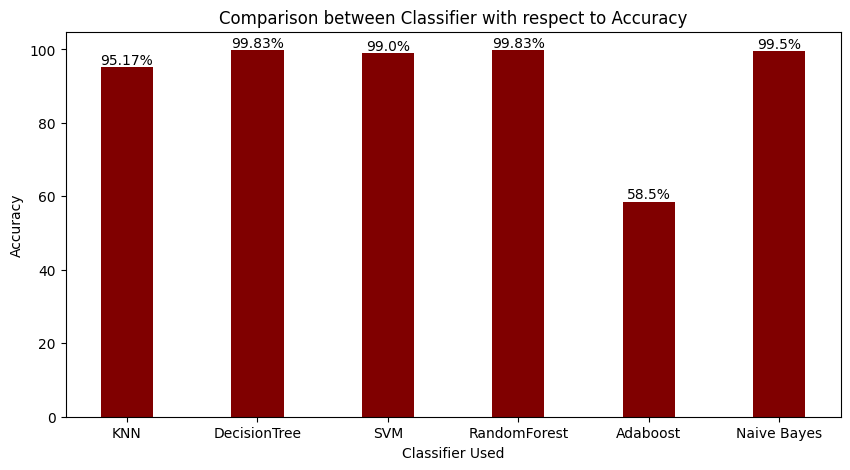

In [ ]:
Classifier = list(AccDict.keys())
Accuracy = list(AccDict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Classifier, Accuracy, color ='maroon',
        width = 0.4)
bars = plt.bar(Classifier, Accuracy, color='maroon', width=0.4)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}%', ha='center', va='bottom')
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifier with respect to Accuracy")
plt.show()